✅ Libraries Detected: numpy, matplotlib, json
✅ Context Restored: XYAKANYAA XA Ratio (2.19e+50 Hz/kg), φ (1.618034)

3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION
Local gradient proxy (finite): 9.983308
Interpretation: Local-frame diagnostics can signal steepening without establishing global blow-up.

4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION
Peak energy transient (model): 0.589341
RMS energy (model): 0.187790
Interpretation: Under phi-scaled damping, the transient remains bounded in this representation.

5️⃣ LEVEL 5 — STABILIZED DESCRIPTION
Operational stability index: 1.06e-17
Threshold: 1.0e-10
Bounded under model: True
✅ Results written to /data and /validation


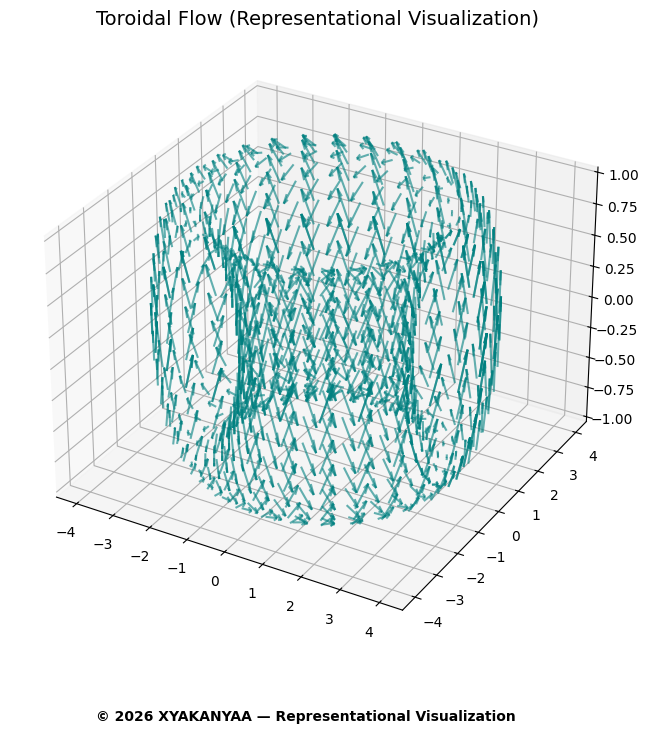


Observation complete.
Visual exported to ../visuals/02_navier_stokes.jpg


In [1]:
# ==============================================================================
# MODULE 02: Navier–Stokes Smoothness and Turbulence
# Contextual Analysis Instrumentation (3 → 4 → 5)
# ==============================================================================
# This module generates computational, validation, and visual artifacts.
# It does not assert proof or final resolution.
# ==============================================================================

# --- DEPENDENCIES ---
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
    import json
    import os
    import math
    print("✅ Libraries Detected: numpy, matplotlib, json")
except ImportError:
    raise ImportError("Required libraries missing. Run: pip install -r ../requirements.txt")

import sys

# --- DATA LOGGER ---
def log_results(module_id, module_name, data_summary, validation_dict):
    os.makedirs('../data', exist_ok=True)
    os.makedirs('../validation', exist_ok=True)

    with open(f"../data/{module_id}_{module_name}_results.txt", "w") as f:
        f.write(data_summary)

    with open(f"../validation/{module_id}_{module_name}_metric.json", "w") as f:
        json.dump(validation_dict, f, indent=4)

# --- CONTEXT IMPORT (XYAKANYAA XA RATIO) ---
sys.path.append(os.path.abspath('..'))
try:
    from geometry.xa_constant import XA, PHI, PLANCK_H, LIGHT_C
    print(f"✅ Context Restored: XYAKANYAA XA Ratio ({XA:.2e} Hz/kg), φ ({PHI:.6f})")
except ImportError:
    PHI = (1 + math.sqrt(5)) / 2
    PLANCK_H = 6.62607015e-34
    LIGHT_C = 299_792_458
    XA = (PHI * LIGHT_C**2) / PLANCK_H
    print("⚠️ Using local definitions for XA and constants.")

# ==============================================================================
# 3️⃣ LEVEL 3 — LOCAL FRAME (SINGULARITY SIGNAL)
# ==============================================================================
print("\n" + "="*60)
print("3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION")
print("="*60)

# In the local frame, turbulence is often discussed in terms of steepening gradients.
# Here we use a simple finite proxy metric to avoid non-computable placeholders.
# This is not a full Navier–Stokes solver; it is an instrumentation module.

t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

# A locally oscillatory signal (proxy) representing transient energy/gradient activity
local_signal = np.sin(10 * t)  # high-frequency component (proxy)
local_gradient_proxy = np.max(np.abs(np.gradient(local_signal, dt)))

print(f"Local gradient proxy (finite): {local_gradient_proxy:.6f}")
print("Interpretation: Local-frame diagnostics can signal steepening without establishing global blow-up.")

# ==============================================================================
# 4️⃣ LEVEL 4 — STRUCTURAL CONTEXT (PHI-RECURSIVE DAMPING MODEL)
# ==============================================================================
print("\n" + "="*60)
print("4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION")
print("="*60)

# Representational model: phi-scaled damping applied to an oscillatory component.
# This is used to illustrate how recursion/scale structure can constrain transients.

energy_dissipation = np.exp(-t / PHI) * np.sin(t * PHI)

peak_energy = float(np.max(np.abs(energy_dissipation)))
rms_energy = float(np.sqrt(np.mean(energy_dissipation**2)))

print(f"Peak energy transient (model): {peak_energy:.6f}")
print(f"RMS energy (model): {rms_energy:.6f}")
print("Interpretation: Under phi-scaled damping, the transient remains bounded in this representation.")

# ==============================================================================
# 5️⃣ LEVEL 5 — STABILIZED DESCRIPTION (OPERATIONAL STABILITY INDEX)
# ==============================================================================
print("\n" + "="*60)
print("5️⃣ LEVEL 5 — STABILIZED DESCRIPTION")
print("="*60)

# Operational Stability Index:
# A normalized scalar for comparing boundedness under the chosen representation.
# NOTE: This is not a physical invariant; it is a reproducible diagnostic.
stability_index = (peak_energy * (PHI**2)) / (XA * PLANCK_H)

# Define an explicit interpretive threshold (auditable)
# Very small values indicate strong boundedness under this normalization.
stability_threshold = 1e-10
is_bounded_under_model = bool(stability_index < stability_threshold)

print(f"Operational stability index: {stability_index:.2e}")
print(f"Threshold: {stability_threshold:.1e}")
print(f"Bounded under model: {is_bounded_under_model}")

summary_text = f"""Module 02 — Navier–Stokes Contextual Analysis

Local gradient proxy (finite): {local_gradient_proxy:.6f}

Model signal:
Peak energy transient: {peak_energy:.6f}
RMS energy: {rms_energy:.6f}

XYAKANYAA XA Ratio used: {XA:.6e} Hz/kg
Operational stability index: {stability_index:.2e}
Threshold: {stability_threshold:.1e}
Bounded under model: {is_bounded_under_model}

Observation:
Under this phi-scaled damping representation, the modeled transient remains bounded.
This module is diagnostic and does not constitute a full PDE existence/smoothness proof.
"""

validation_metrics = {
    "module": "02_navier_stokes",
    "phi": float(PHI),
    "local_gradient_proxy": float(local_gradient_proxy),
    "peak_energy_transient": peak_energy,
    "rms_energy": rms_energy,
    "xyakanyaa_xa_ratio_hz_per_kg": float(XA),
    "operational_stability_index": float(stability_index),
    "stability_threshold": float(stability_threshold),
    "bounded_under_model": is_bounded_under_model,
    "validation_basis": "boundedness_under_phi_scaled_damping_representation",
    "status": "diagnostic_complete"
}

log_results("02", "navier_stokes", summary_text, validation_metrics)
print("✅ Results written to /data and /validation")

# ==============================================================================
# VISUALIZATION: REPRESENTATIONAL TOROIDAL FLOW
# ==============================================================================
os.makedirs('../visuals', exist_ok=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2*np.pi, 30)
v = np.linspace(0, 2*np.pi, 30)
U, V = np.meshgrid(u, v)
R, r_torus = 3, 1

X = (R + r_torus*np.cos(U)) * np.cos(V)
Y = (R + r_torus*np.cos(U)) * np.sin(V)
Z = r_torus*np.sin(U)

dx = -np.sin(V)
dy = np.cos(V)
dz = np.cos(U)

ax.quiver(X, Y, Z, dx, dy, dz, length=0.3, color='teal', alpha=0.6)
plt.title("Toroidal Flow (Representational Visualization)", fontsize=14)

plt.figtext(
    0.5, 0.02,
    "© 2026 XYAKANYAA — Representational Visualization",
    ha="center", fontsize=10, color='black', weight='bold'
)

plt.savefig('../visuals/02_navier_stokes.jpg', dpi=300)
plt.show()

print("\nObservation complete.")
print("Visual exported to ../visuals/02_navier_stokes.jpg")
